# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [5]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI/') # appends this path to the list of system paths
from pycocotools.coco import COCO

In [13]:
# initialize COCO API for instance annotations
dataDir = 'cocoapi-master/annotations'
dataType = 'val2014'
instances_annfile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType) )
new_path = os.path.join(dataDir,'annotations',dataType)
print(new_path)
print(instances_annfile)
dataType.format

cocoapi-master/annotations/annotations/val2014
cocoapi-master/annotations/annotations/instances_val2014.json


<function str.format>

In [14]:
# initialize COCO API for instance annotations
dataDir = 'cocoapi-master/annotations'
dataType = 'val2014'
instances_annfile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType) )
print(instances_annfile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
print(captions_annFile)

cocoapi-master/annotations/annotations/instances_val2014.json
cocoapi-master/annotations/annotations/captions_val2014.json


In [15]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI/')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataDir = 'cocoapi-master/annotations'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=10.58s)
creating index...
index created!
loading annotations into memory...
Done (t=4.31s)
creating index...
index created!


In [20]:
import json

In [27]:
dataset1 = json.load(open(instances_annFile))

In [47]:
print(dataset1.keys())
print(len(dataset1['images']))
print(len(dataset1['annotations']))
print(len(dataset1['categories']))
cats = (len(dataset1['categories']))
#print(dataset1['info'])
#print(dataset1['licenses'])
#for j in range(cats):
    #print(dataset1['categories'][j])
#print(dataset1['categories'])
print(dataset1['annotations'][0])

dict_keys(['info', 'images', 'licenses', 'annotations', 'categories'])
40504
291875
80
{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}


In [59]:
type(dataset1)
#for ann in dataset1['annotations']:
    #print(ann['image_id'])

dict

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
%matplotlib inline
print(coco.anns[156])
imageid = coco.anns[156]['image_id']
print(imageid)
img_url = coco.imgs[imageid]['coco_url']
print(img_url)

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
558840
http://images.cocodataset.org/val2014/COCO_val2014_000000558840.jpg


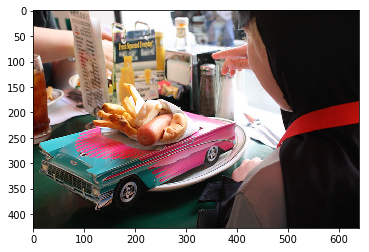

In [68]:
img = io.imread(img_url)
plt.imshow(img)

In [70]:
type(coco_caps)

pycocotools.coco.COCO

http://images.cocodataset.org/val2014/COCO_val2014_000000270316.jpg


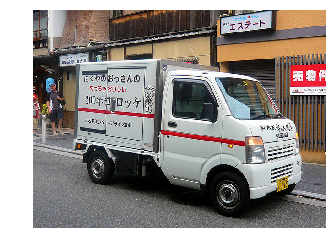

A delivery truck parked in front of a store on a street.
A car that is on the side of a road.
A foreign mini truck is parked along side a building.
Chinese delivery truck parked in front of a building.
A small box truck parked on a city street.


In [69]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)